# _TODO_ adicionar análise e comentários :D 

# Análise das amostras VALID DES - SV

A ideia principal será analisar algumas características após o cálculo fotométrico do redshift da amostra Valid disponibilizada pelo Dark Energy Survey e utilizada para treinar algoritmos. A amostra consta com dados de observações de aproximadamente 5800 galáxias.

## 0 - Setup 
Importando as bibliotecas que serão utilizadas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp

Lendo o arquivo original

In [4]:
headers=[
    "u_auto", "u_auto_err", "u_det", "u_det_err",
    "g_auto", "g_auto_err", "g_det", "g_det_err", 
    "r_auto", "r_auto_err", "r_det", "r_det_err", 
    "i_auto", "i_auto_err", "i_det", "i_det_err", 
    "z_auto", "z_auto_err", "z_det", "z_det_err", 
    "Y_auto", "Y_auto_err", "Y_det", "Y_det_err", 
    "z", "ra", "dec", "z_flags", "field_id", "number"
]

bandas = [
    "u",
    "g",
    "r",
    "i",
    "z",
    "Y",
]

data_frame = pd.read_csv("../../Amostras/des_sv_main_standard.valid", delimiter=" ", names=headers)
data_frame.head()

,u_auto,u_auto_err,u_det,u_det_err,g_auto,g_auto_err,g_det,g_det_err,r_auto,r_auto_err,...,Y_auto,Y_auto_err,Y_det,Y_det_err,z,ra,dec,z_flags,field_id,number
0,21.289967,0.093643,21.219734,0.054884,19.387075,0.005967,19.260431,0.003744,18.104645,0.002704,...,17.164825,0.007467,16.888165,0.003766,0.245993,209.498860,4.836928,3.0,17.0,598.0
1,22.749687,0.423850,22.873457,0.257264,20.505518,0.022398,20.463280,0.011917,18.776411,0.007223,...,17.474281,0.010851,17.226788,0.004808,0.440788,208.951428,4.840718,3.0,17.0,838.0
2,20.138296,0.032109,19.973942,0.016162,18.394489,0.003026,18.232428,0.002069,17.466225,0.001982,...,16.573366,0.003937,16.371433,0.002027,0.124661,209.306185,4.840306,3.0,17.0,941.0
3,102.300003,99.000000,24.871027,2.332464,21.658445,0.048645,21.113125,0.027328,19.963562,0.015980,...,18.681070,0.026179,17.916897,0.013276,0.516412,208.922027,4.845657,3.0,17.0,1000.0
4,19.335194,0.018206,19.416962,0.012183,18.125895,0.002492,18.098228,0.001835,17.608807,0.002138,...,16.905123,0.006214,16.588104,0.002838,0.111794,209.504721,4.866663,3.0,17.0,2883.0


todo - remover as primeiras linhas

In [5]:
headers_bpz = [
"id",
"zb",
"zbmin",
"zbmax",
"tb",
"odds",
"zml",
"tml",
"chisq",
"zspec",
"M0",
"other",
"chisq2",
"nfdet",
"nfobs",
]

data_frame_bpz = pd.read_csv("main_valid_bpz.cat", delim_whitespace=True, names=headers_bpz)
data_frame_bpz.head()

,id,zb,zbmin,zbmax,tb,odds,zml,tml,chisq,zspec,M0,other,chisq2,nfdet,nfobs
0,598,0.20,0.082,0.318,1.0,1.0000,0.20,1.000,7.270,0.246,18.105,17,0.2091,5,5
1,838,0.43,0.290,0.570,1.0,1.0000,3.62,1.667,1.353,0.441,18.776,17,0.0722,5,5
2,941,0.10,0.000,0.208,1.0,1.0000,0.10,1.000,16.107,0.125,17.466,17,0.4516,5,5
3,1000,0.40,0.040,0.860,0.0,0.4655,3.90,2.333,0.090,0.516,19.964,17,4974.7587,4,5
4,2883,0.01,0.000,0.109,2.0,1.0000,0.01,2.000,10.375,0.112,17.609,17,0.1901,5,5


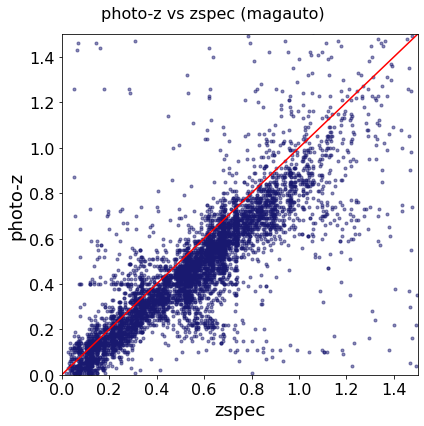

In [16]:
plt.figure(figsize=[6,6])
plt.suptitle("photo-z vs zspec (magauto)", fontsize=16)

plt.plot(data_frame_bpz["zspec"], data_frame_bpz["zb"], f".", color="midnightblue", alpha=0.5)
plt.plot([0, 2], [0, 2], 'r-')

plt.ylabel("photo-z", fontsize=18)
plt.xlabel("zspec", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

plt.tight_layout()

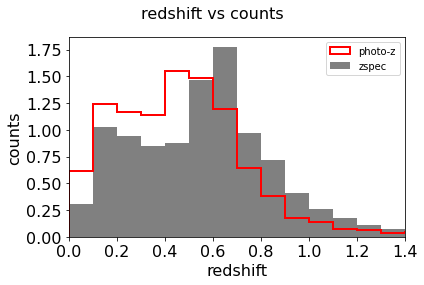

In [15]:
plt.suptitle("redshift vs counts", fontsize=16)

plt.hist(data_frame_bpz["zb"], bins=np.arange(0,2,0.1), histtype="step", density=True, color="r", lw=2, label="photo-z")
plt.hist(data_frame_bpz["zspec"], bins=np.arange(0,2,0.1), density=True, label="zspec", color="gray")

plt.xlabel("redshift", fontsize=16)
plt.ylabel("counts", fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

plt.xlim(0, 1.4)

plt.tight_layout()